# Imports
* we'll Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and sklearn.
* Also, to see the visualization inside our page we'll use %matplotlib inline

In [33]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# Read Data

We'll work with the Germany House Price csv file which inclue the house prices and features including the number of Living Spaces, Room, Bedrooms and Bathrooms in considered

* We will read the Germany House Price csv file as a DataFrame called data.*

In [34]:
data = pd.read_csv("germany_housing_data.csv")

In [35]:
data.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [36]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
# show the head after deleting the Unnamed column
data.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [38]:
data.tail()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
10547,1495000.0,Special property,167.00,683.0,63.0,nach Vereinbarung,6.5,4.0,3.0,NaN,...,Fernwärme,available,consumption certificate,113.2,D,Bayern,München,Perlach,1.0,Garage
10548,449000.0,Mid-terrace house,222.00,4000.0,NaN,NaN,6.0,5.0,3.0,1.0,...,Erdwärme,available,demand certificate,NaN,A+,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot
10549,678000.0,Mid-terrace house,142.00,377.0,NaN,31.07.2021,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage
10550,419900.0,Mid-terrace house,120.83,501.0,NaN,sofort,5.0,NaN,1.0,2.0,...,NaN,available,demand certificate,NaN,A+,Sachsen-Anhalt,Börde (Kreis),Wolmirstedt,1.0,Garage
10551,699000.0,Multiple dwelling,145.00,357.0,NaN,NaN,5.5,4.0,1.0,3.0,...,"Solar, Gas",available,demand certificate,NaN,A,Bayern,Augsburg (Kreis),Diedorf,2.0,Garage


In [39]:
data.shape

(10552, 25)

* Number of rows: 10552
* Number of columns: 25

In [40]:
data.columns

Index(['Price', 'Type', 'Living_space', 'Lot', 'Usable_area',
       'Free_of_Relation', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors',
       'Year_built', 'Furnishing_quality', 'Year_renovated', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'State', 'City', 'Place', 'Garages',
       'Garagetype'],
      dtype='object')

In [41]:
data.describe()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,1.055200e+04,10552.000000,10552.000000,5568.000000,10552.000000,6878.000000,8751.000000,7888.000000,9858.000000,5349.000000,2433.000000,8592.000000
mean,5.566851e+05,216.721008,1491.659004,134.300424,7.388978,4.169817,2.308993,2.283976,1958.821465,2010.706300,117.663111,2.698673
std,6.087410e+05,172.421321,8582.361675,188.814089,5.378126,2.577169,1.742330,0.821288,55.958072,10.548651,54.023207,3.195068
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2.500000e+05,130.000000,370.000000,48.000000,5.000000,3.000000,1.000000,2.000000,1935.000000,2006.000000,83.170000,1.000000
50%,4.052150e+05,176.775000,656.500000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,6.550000e+05,250.000000,1047.000000,150.250000,8.000000,5.000000,3.000000,3.000000,1996.000000,2018.000000,146.000000,3.000000
max,1.300000e+07,5600.000000,547087.000000,4034.000000,170.000000,61.000000,44.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10552 non-null  float64
 1   Type                     10150 non-null  object 
 2   Living_space             10552 non-null  float64
 3   Lot                      10552 non-null  float64
 4   Usable_area              5568 non-null   float64
 5   Free_of_Relation         6983 non-null   object 
 6   Rooms                    10552 non-null  float64
 7   Bedrooms                 6878 non-null   float64
 8   Bathrooms                8751 non-null   float64
 9   Floors                   7888 non-null   float64
 10  Year_built               9858 non-null   float64
 11  Furnishing_quality       7826 non-null   object 
 12  Year_renovated           5349 non-null   float64
 13  Condition                10229 non-null  object 
 14  Heating               

In [43]:
# let's see kinds of Garagetype we have !!

In [44]:
data.Garagetype.unique()

array(['Parking lot', 'Garage', 'Outside parking lot', 'Carport', nan,
       'Underground parking lot', 'Duplex lot', 'Car park lot'],
      dtype=object)

In [45]:
data.Garagetype.value_counts()

Garage                     4412
Outside parking lot        1695
Parking lot                1603
Carport                     732
Underground parking lot      96
Duplex lot                   48
Car park lot                  6
Name: Garagetype, dtype: int64

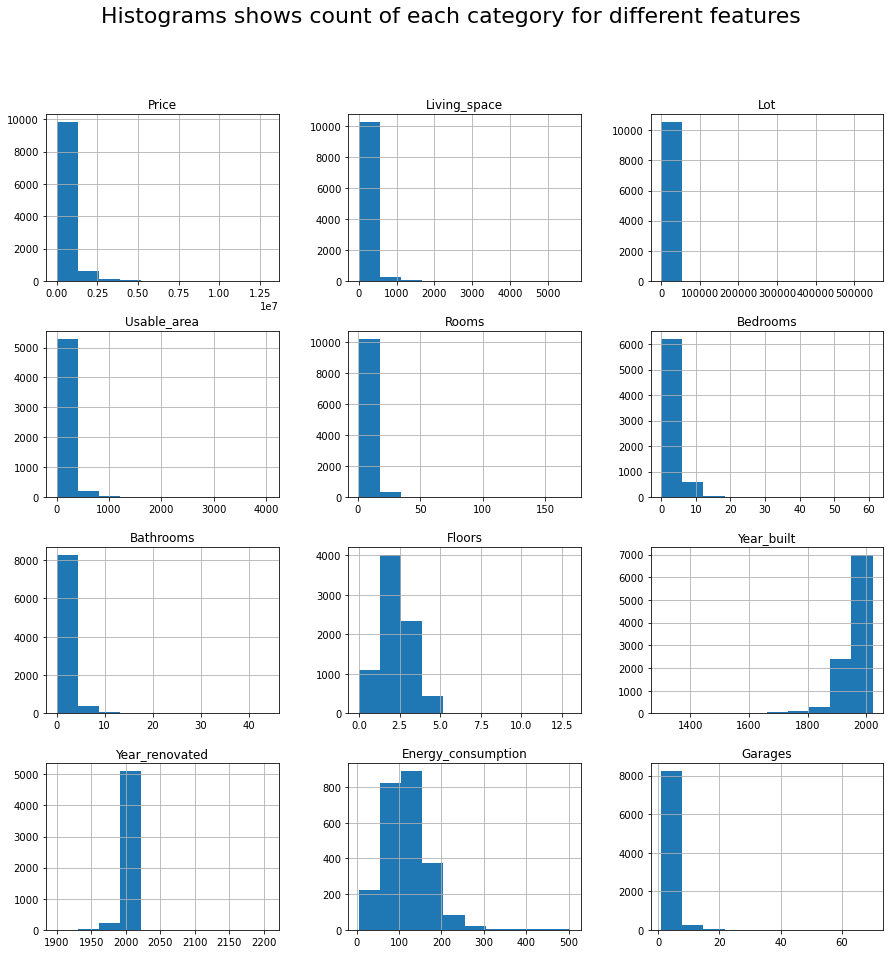

In [46]:
# Draw Histogram to show distribution of data for each feature
data.hist(figsize=(15,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);

In [47]:
##

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

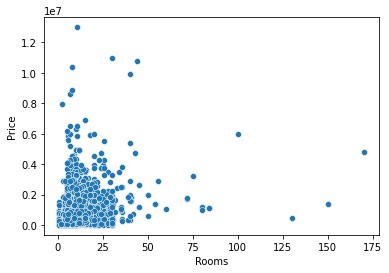

In [48]:
sns.scatterplot(x='Rooms', y='Price', data=data)

In [49]:
##

<AxesSubplot:xlabel='Year_built', ylabel='Price'>

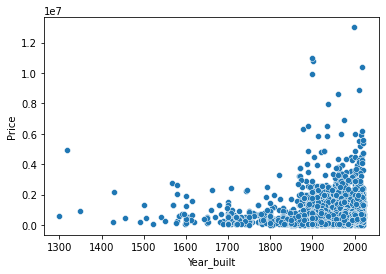

In [50]:
sns.scatterplot(x='Year_built', y='Price', data=data)

In [51]:
##

<AxesSubplot:xlabel='Garagetype', ylabel='Price'>

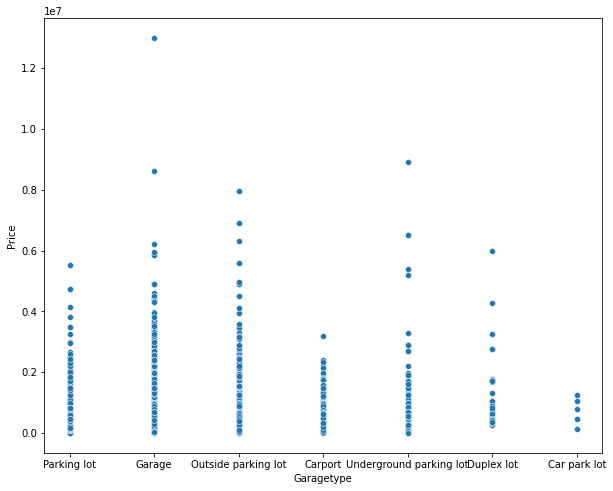

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Garagetype', y='Price', data=data)

In [53]:
##

<AxesSubplot:xlabel='Garages', ylabel='Price'>

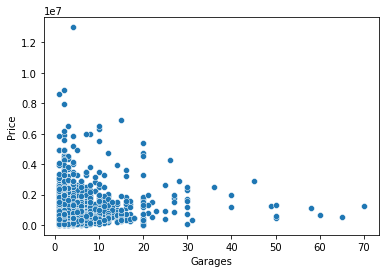

In [54]:
sns.scatterplot(x='Garages', y='Price', data=data)

In [55]:
##

# correlation

In [56]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
Price,1.000000,0.446918,0.102918,0.236348,0.310036,0.243096,0.337692,0.249836,0.101132,0.127030,-0.129739,0.183602
Living_space,0.446918,1.000000,0.109207,0.600216,0.803533,0.691233,0.720495,0.311420,-0.100335,0.014592,-0.054003,0.492298
Lot,0.102918,0.109207,1.000000,0.212346,0.084986,0.067207,0.086181,-0.007970,-0.054313,-0.005176,-0.005803,0.124230
Usable_area,0.236348,0.600216,0.212346,1.000000,0.436128,0.293705,0.320843,0.136956,-0.113747,-0.019543,0.024015,0.334740
Rooms,0.310036,0.803533,0.084986,0.436128,1.000000,0.824331,0.770841,0.314214,-0.153242,-0.007472,0.032371,0.432907
Bedrooms,0.243096,0.691233,0.067207,0.293705,0.824331,1.000000,0.714644,0.266107,-0.095104,0.013915,-0.013187,0.315687
Bathrooms,0.337692,0.720495,0.086181,0.320843,0.770841,0.714644,1.000000,0.269254,-0.079074,0.043903,0.027879,0.366938
Floors,0.249836,0.311420,-0.007970,0.136956,0.314214,0.266107,0.269254,1.000000,-0.091232,0.027168,-0.026301,0.107773
Year_built,0.101132,-0.100335,-0.054313,-0.113747,-0.153242,-0.095104,-0.079074,-0.091232,1.000000,0.214226,-0.288640,-0.069526
Year_renovated,0.127030,0.014592,-0.005176,-0.019543,-0.007472,0.013915,0.043903,0.027168,0.214226,1.000000,-0.155260,-0.009605


* Columns with more than 30% missing values

<AxesSubplot:>

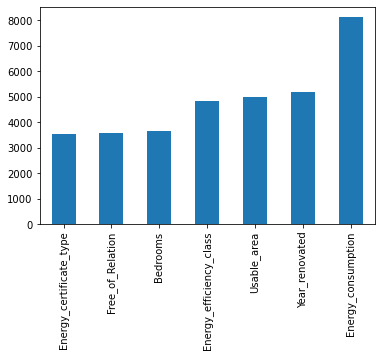

In [57]:
missing = data.isnull().sum()
missing = missing[missing > 3000]
missing.sort_values(inplace=True)
missing.plot.bar()

# Data Cleaning

In [58]:
# We wabt to remove columns with more than 30% missing values

In [59]:
# First: we defined varibale called "column_remove" 
column_remove = list(missing.keys())
column_remove

['Energy_certificate_type',
 'Free_of_Relation',
 'Bedrooms',
 'Energy_efficiency_class',
 'Usable_area',
 'Year_renovated',
 'Energy_consumption']

In [60]:
# Second : Remove the missing 
data.drop(column_remove,axis=1,inplace=True)
data

,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,5.5,1.0,2.0,2005.0,normal,modernized,central heating,Gas,available,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,6.0,2.0,NaN,1994.0,basic,modernized,stove heating,NaN,not required by law,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,5.0,2.0,4.0,2013.0,NaN,dilapidated,stove heating,"Fernwärme, Bioenergie",available,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,4.0,2.0,2.0,1900.0,basic,fixer-upper,central heating,Strom,available,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,4.5,1.0,NaN,1968.0,refined,refurbished,central heating,Öl,available,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,1495000.0,Special property,167.00,683.0,6.5,3.0,NaN,1976.0,NaN,first occupation after refurbishment,stove heating,Fernwärme,available,Bayern,München,Perlach,1.0,Garage
10548,449000.0,Mid-terrace house,222.00,4000.0,6.0,3.0,1.0,2017.0,NaN,dilapidated,oil heating,Erdwärme,available,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot
10549,678000.0,Mid-terrace house,142.00,377.0,4.0,NaN,NaN,2021.0,basic,dilapidated,central heating,NaN,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage
10550,419900.0,Mid-terrace house,120.83,501.0,5.0,1.0,2.0,2019.0,normal,NaN,stove heating,NaN,available,Sachsen-Anhalt,Börde (Kreis),Wolmirstedt,1.0,Garage


* Get object columns and numerical columns

In [61]:
object_columns = data.select_dtypes(include=['object']).columns
numerical_columns =data.select_dtypes(exclude=['object']).columns

In [62]:
numerical_columns

Index(['Price', 'Living_space', 'Lot', 'Rooms', 'Bathrooms', 'Floors',
       'Year_built', 'Garages'],
      dtype='object')

In [63]:
# here list of all object column
object_columns

Index(['Type', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source',
       'Energy_certificate', 'State', 'City', 'Place', 'Garagetype'],
      dtype='object')

* Calculate the most frequently (MODE) for every object columns

In [64]:
for obj in object_columns:
  print(obj,'\n',data[obj].mode(),'\n')

Type 
 0    Mid-terrace house
dtype: object 

Furnishing_quality 
 0    normal
dtype: object 

Condition 
 0    modernized
dtype: object 

Heating 
 0    stove heating
dtype: object 

Energy_source 
 0     Gas 
dtype: object 

Energy_certificate 
 0    available
dtype: object 

State 
 0    Nordrhein-Westfalen
dtype: object 

City 
 0    Hannover (Kreis)
dtype: object 

Place 
 0    Innenstadt
dtype: object 

Garagetype 
 0    Garage
dtype: object 



* now we want to fill object columns by mode

In [65]:
for obj in object_columns:
  data[obj].fillna(data[obj].mode()[0],inplace=True)

In [66]:
# let's show the head

In [67]:
data.head()

,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,5.5,1.0,2.0,2005.0,normal,modernized,central heating,Gas,available,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,6.0,2.0,NaN,1994.0,basic,modernized,stove heating,Gas,not required by law,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,5.0,2.0,4.0,2013.0,normal,dilapidated,stove heating,"Fernwärme, Bioenergie",available,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,4.0,2.0,2.0,1900.0,basic,fixer-upper,central heating,Strom,available,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,4.5,1.0,NaN,1968.0,refined,refurbished,central heating,Öl,available,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [68]:
for col_num in numerical_columns:
  data[col_num].fillna(data[col_num].mean(),inplace=True)
data.head()

,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,5.5,1.0,2.000000,2005.0,normal,modernized,central heating,Gas,available,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,6.0,2.0,2.283976,1994.0,basic,modernized,stove heating,Gas,not required by law,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,5.0,2.0,4.000000,2013.0,normal,dilapidated,stove heating,"Fernwärme, Bioenergie",available,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,4.0,2.0,2.000000,1900.0,basic,fixer-upper,central heating,Strom,available,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,4.5,1.0,2.283976,1968.0,refined,refurbished,central heating,Öl,available,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


# Be sure that data is clean 

In [69]:
data.isnull().sum()

Price                 0
Type                  0
Living_space          0
Lot                   0
Rooms                 0
Bathrooms             0
Floors                0
Year_built            0
Furnishing_quality    0
Condition             0
Heating               0
Energy_source         0
Energy_certificate    0
State                 0
City                  0
Place                 0
Garages               0
Garagetype            0
dtype: int64

* We will Drop duplicate samples

In [70]:
data = data.drop_duplicates()

* Feature encoding and preprocessing
* Label encoder for object columns

In [71]:
from sklearn.preprocessing import OrdinalEncoder

onc = OrdinalEncoder()
data[object_columns] = onc.fit_transform(data[object_columns])
data.head()

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
0,498000.0,6.0,106.00,229.0,5.5,1.0,2.000000,2005.0,2.0,7.0,0.0,22.0,0.0,0.0,55.0,409.0,2.0,5.0
1,495000.0,5.0,140.93,517.0,6.0,2.0,2.283976,1994.0,0.0,7.0,10.0,22.0,2.0,0.0,236.0,1073.0,7.0,5.0
2,749000.0,4.0,162.89,82.0,5.0,2.0,4.000000,2013.0,2.0,2.0,10.0,16.0,0.0,0.0,121.0,3207.0,1.0,3.0
3,259000.0,4.0,140.00,814.0,4.0,2.0,2.000000,1900.0,0.0,5.0,0.0,82.0,0.0,0.0,499.0,542.0,1.0,3.0
4,469000.0,6.0,115.00,244.0,4.5,1.0,2.283976,1968.0,3.0,8.0,0.0,94.0,0.0,0.0,121.0,2426.0,1.0,3.0


In [72]:
numerical_columns

Index(['Price', 'Living_space', 'Lot', 'Rooms', 'Bathrooms', 'Floors',
       'Year_built', 'Garages'],
      dtype='object')

## Standard scaller for numurical columns

In [73]:
cls_to_standard = [  'Living_space', 'Lot', 'Rooms', 'Bathrooms',
       'Floors', 'Year_built', 'Garages']


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[cls_to_standard] = scaler.fit_transform(data[cls_to_standard])
data.head()

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
0,498000.0,6.0,-0.637130,-0.145296,-0.349322,-0.821145,-0.398759,0.855553,2.0,7.0,0.0,22.0,0.0,0.0,55.0,409.0,-0.240370,5.0
1,495000.0,5.0,-0.435269,-0.111990,-0.256786,-0.192574,0.001081,0.651884,0.0,7.0,10.0,22.0,2.0,0.0,236.0,1073.0,1.487712,5.0
2,749000.0,4.0,-0.308361,-0.162295,-0.441858,-0.192574,2.417260,1.003677,2.0,2.0,10.0,16.0,0.0,0.0,121.0,3207.0,-0.585987,3.0
3,259000.0,4.0,-0.440643,-0.077643,-0.626929,-0.192574,-0.398759,-1.088566,0.0,5.0,0.0,82.0,0.0,0.0,499.0,542.0,-0.585987,3.0
4,469000.0,6.0,-0.585119,-0.143561,-0.534393,-0.821145,0.001081,0.170483,3.0,8.0,0.0,94.0,0.0,0.0,121.0,2426.0,-0.585987,3.0


* Describe the correlation after data cleaning and preprocessing

In [75]:
corr = data.corr()

In [76]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,City,Place,Garages,Garagetype
Price,1.000000,0.059401,0.445893,0.102246,0.309536,0.291511,0.226751,0.103422,-0.058314,-0.165246,-0.043088,-0.052530,0.033257,-0.239231,-0.018344,0.001697,0.161714,0.023093
Type,0.059401,1.000000,-0.179428,-0.047755,-0.243661,-0.194128,-0.103918,0.181109,-0.020629,-0.074185,-0.009736,-0.026797,-0.023925,-0.019502,-0.010444,0.008228,-0.153230,-0.045956
Living_space,0.445893,-0.179428,1.000000,0.108303,0.803060,0.487059,0.268560,-0.089022,-0.022187,-0.034705,-0.022781,-0.008465,0.053629,-0.015149,0.020296,-0.005950,0.409732,0.057950
Lot,0.102246,-0.047755,0.108303,1.000000,0.083913,0.078666,-0.003789,-0.040987,0.009362,-0.001325,-0.009367,0.024938,-0.005435,0.003333,0.003454,0.006731,0.097113,-0.013755
Rooms,0.309536,-0.243661,0.803060,0.083913,1.000000,0.528985,0.271653,-0.134448,-0.010312,0.015477,-0.007892,-0.006206,0.051865,-0.002818,0.006973,-0.009495,0.332454,0.055871
Bathrooms,0.291511,-0.194128,0.487059,0.078666,0.528985,1.000000,0.216196,-0.061707,-0.010958,-0.011065,-0.016445,-0.039711,0.028517,-0.004127,0.011472,-0.009443,0.256416,0.035224
Floors,0.226751,-0.103918,0.268560,-0.003789,0.271653,0.216196,1.000000,-0.072398,0.015124,-0.001631,-0.037406,-0.029786,0.036615,-0.138793,-0.019588,-0.007346,0.081341,0.006162
Year_built,0.103422,0.181109,-0.089022,-0.040987,-0.134448,-0.061707,-0.072398,1.000000,-0.034712,-0.178129,-0.040869,-0.015727,0.028505,-0.100000,-0.006951,-0.003927,-0.055480,-0.024249
Furnishing_quality,-0.058314,-0.020629,-0.022187,0.009362,-0.010312,-0.010958,0.015124,-0.034712,1.000000,0.054129,0.064973,0.018856,0.108865,-0.005855,-0.008698,-0.002037,0.004551,-0.042274
Condition,-0.165246,-0.074185,-0.034705,-0.001325,0.015477,-0.011065,-0.001631,-0.178129,0.054129,1.000000,0.080645,0.088250,0.007040,0.042180,-0.003457,-0.008730,-0.007817,0.004886


* Describe correlation between target and other feautres

In [77]:
data.corr()['Price']

Price                 1.000000
Type                  0.059401
Living_space          0.445893
Lot                   0.102246
Rooms                 0.309536
Bathrooms             0.291511
Floors                0.226751
Year_built            0.103422
Furnishing_quality   -0.058314
Condition            -0.165246
Heating              -0.043088
Energy_source        -0.052530
Energy_certificate    0.033257
State                -0.239231
City                 -0.018344
Place                 0.001697
Garages               0.161714
Garagetype            0.023093
Name: Price, dtype: float64

* Get the correlated features > 0.2

In [78]:
X_cls = ['Living_space','Rooms' , 'Bathrooms', 'Floors','State']

In [79]:
X= data[X_cls]
y = data['Price']

* Split data into 80% train and 20% test

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Modeling and evaluating

* Linear regression

In [81]:
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()

lrg.fit(X_train,y_train)

LinearRegression()

* Evaluate the model

In [82]:
from sklearn.metrics import mean_squared_error
loss1 = mean_squared_error(lrg.predict(X_test),y_test)
loss1

299876432390.8765

* Using only Living_space and Rooms

In [83]:
X_cls = ['Living_space','Rooms']
X= data[X_cls]
y = data['Price']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

lrg = LinearRegression()

lrg.fit(X_train,y_train)
loss2 = mean_squared_error(lrg.predict(X_test),y_test)
loss2

340332617929.7093

* Using All feautres

In [85]:
X= data.drop(['Price'],axis=1)
y = data['Price']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

lrg = LinearRegression()

lrg.fit(X_train,y_train)
loss3 = mean_squared_error(lrg.predict(X_test),y_test)
loss3

243427882060.61996

* select features > 0.1 correlation

In [86]:
cl = ['Living_space','Rooms' , 'Bathrooms', 'Floors','State','Lot','Condition','Garages']
X= data[cl]
y = data['Price']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

lrg = LinearRegression()

lrg.fit(X_train,y_train)
loss4 = mean_squared_error(lrg.predict(X_test),y_test)
loss4

285657389811.3667

# Comparaison

In [87]:
print('loss1 : ',loss1 ,'\nloss2 : ', loss2 ,'\nloss3 : ',  loss3,'\nloss4 : ',  loss4)

loss1 :  299876432390.8765 
loss2 :  340332617929.7093 
loss3 :  243427882060.61996 
loss4 :  285657389811.3667


In [ ]:
##

# done !

In [ ]:
##